In [508]:
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from manifold_learning import imd_nd_smap
from sklearn.decomposition import PCA
import importlib
importlib.reload(imd_nd_smap)
importlib.reload(CCM)

<module 'FastCCM.CCM' from '/home/iaroslav/Documents/Python projects/FastCCM/src/FastCCM/CCM.py'>

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [509]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [510]:
X = get_truncated_lorenz_rand(400,n_steps=20000,)

observables = StandardScaler().fit_transform(X)

In [511]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),10), np.linspace(X[:,2].min(),X[:,2].max(),10))).reshape(2,-1).T

In [512]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]

In [515]:

observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=8) for e in exp_kernel_grid]) for x in X_]).T
#observables[observables < 0.1] = 0
mixing_mat = np.random.normal(size=(observables.shape[1],observables.shape[1]))
observables = observables @ mixing_mat
observables = StandardScaler().fit_transform(observables)


In [467]:

observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=8) for e in exp_kernel_grid]) for x in X_]).T
#observables[observables < 0.1] = 0
mixing_mat = np.random.normal(size=(observables.shape[1],observables.shape[1]))
mixing_mat1 = np.random.normal(size=(observables.shape[1],observables.shape[1]))
mixing_mat2 = np.random.normal(size=(observables.shape[1],observables.shape[1]))
mixing_mat3 = np.random.normal(size=(observables.shape[1],observables.shape[1]))
observables = observables @ mixing_mat
observables = StandardScaler().fit_transform(observables) * 2
observables = sigmoid(observables)
observables = observables @ mixing_mat1
observables = StandardScaler().fit_transform(observables) * 2
observables = sigmoid(observables)
observables = observables @ mixing_mat2
observables = StandardScaler().fit_transform(observables) * 2
observables = sigmoid(observables)

In [28]:

observables = utils.get_td_embedding_np(observables,3,5).reshape(-1,3*observables.shape[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


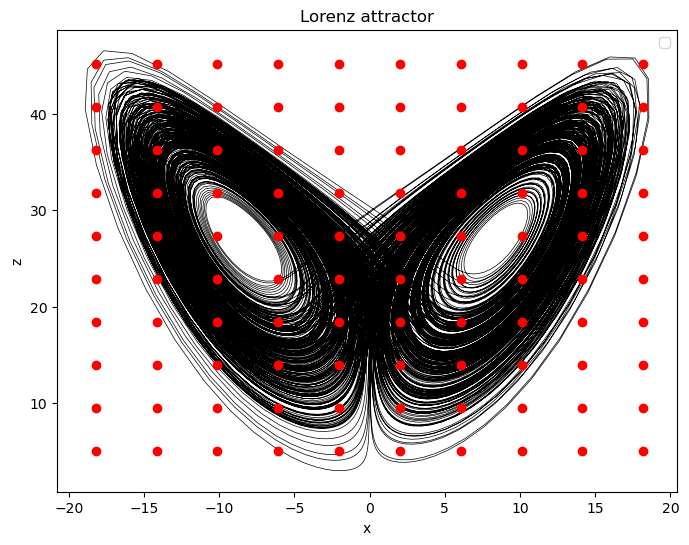

In [516]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(X_[0][:,0],X_[0][:,1],color="black",lw=0.5)
plt.scatter(*exp_kernel_grid.T,color="red",zorder=100)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Lorenz attractor")
plt.legend()

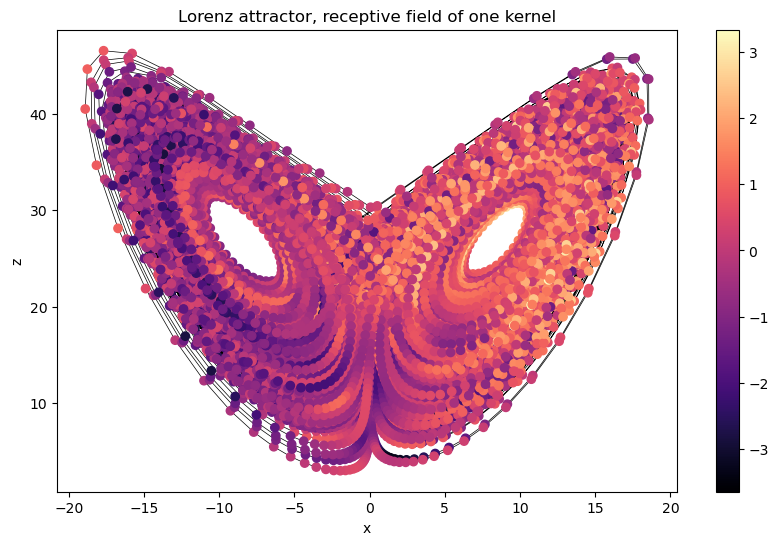

In [517]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(X_[0][:,0],X_[0][:,1],color="black",lw=0.5)
plt.scatter(X_[0][:,0],X_[0][:,1],c=observables[:,26],zorder=100,cmap="magma")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Lorenz attractor, receptive field of one kernel")
plt.colorbar()

Text(0, 0.5, 'Observation')

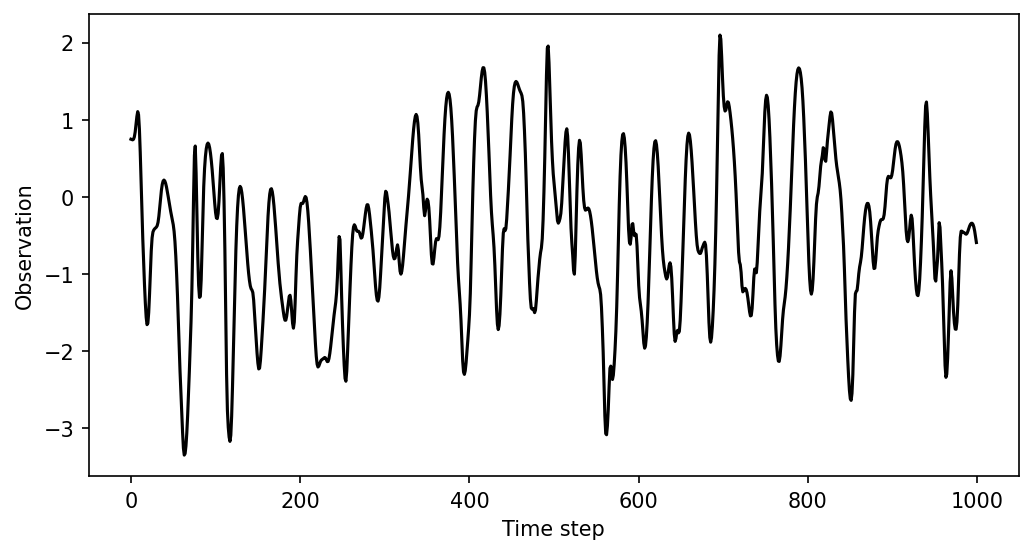

In [518]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(observables[:1000,26],color="black")
plt.xlabel("Time step")
plt.ylabel("Observation")

Text(0.5, 0, 'Time step')

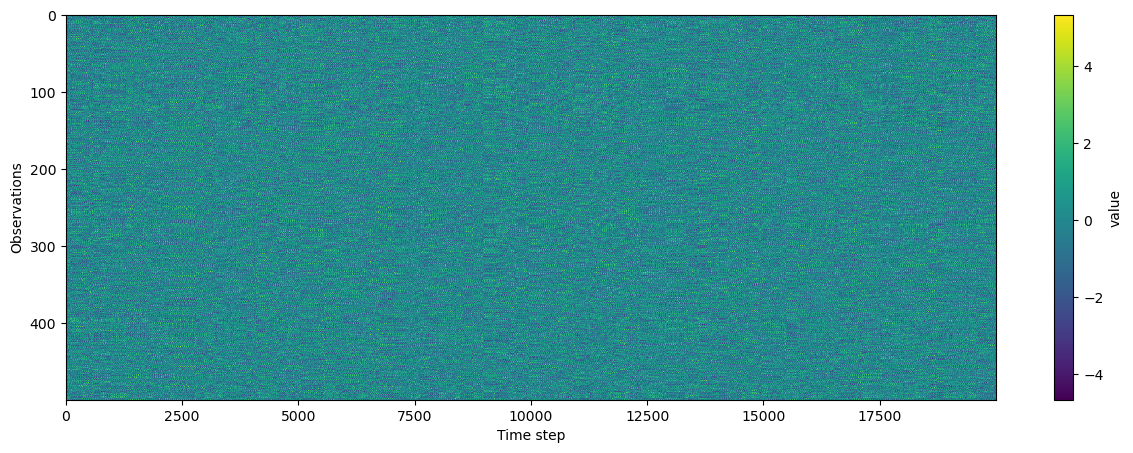

In [519]:
plt.figure(figsize=(15,5))
plt.imshow(observables.T,aspect="auto",interpolation="nearest")
plt.colorbar(label="value")
plt.ylabel("Observations")
plt.xlabel("Time step")

In [540]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=2, n_components=5, subtract_corr=True, device="cuda")



In [567]:
trainer.fit(observables, sample_len=150, library_len=800, 
            exclusion_rad=30, theta=6, tp=30, 
            epochs=1000, num_batches=32,optimizer="Adagrad", learning_rate=0.01, tp_policy="range",loss_mask_size=3)
            


Epoch 1/1000, Loss: 0.4108
Epoch 2/1000, Loss: 0.4271
Epoch 3/1000, Loss: 0.4245
Epoch 4/1000, Loss: 0.4336
Epoch 5/1000, Loss: 0.4388
Epoch 6/1000, Loss: 0.4214
Epoch 7/1000, Loss: 0.4486
Epoch 8/1000, Loss: 0.4326
Epoch 9/1000, Loss: 0.4340
Epoch 10/1000, Loss: 0.4161
Epoch 11/1000, Loss: 0.4281
Epoch 12/1000, Loss: 0.4227
Epoch 13/1000, Loss: 0.4418
Epoch 14/1000, Loss: 0.4193
Epoch 15/1000, Loss: 0.4246
Epoch 16/1000, Loss: 0.4644
Epoch 17/1000, Loss: 0.4175
Epoch 18/1000, Loss: 0.4159
Epoch 19/1000, Loss: 0.4354
Epoch 20/1000, Loss: 0.4308
Epoch 21/1000, Loss: 0.4347
Epoch 22/1000, Loss: 0.4139
Epoch 23/1000, Loss: 0.4308
Epoch 24/1000, Loss: 0.4348
Epoch 25/1000, Loss: 0.4269
Epoch 26/1000, Loss: 0.3989
Epoch 27/1000, Loss: 0.4214
Epoch 28/1000, Loss: 0.4430
Epoch 29/1000, Loss: 0.4438
Epoch 30/1000, Loss: 0.4075
Epoch 31/1000, Loss: 0.4395
Epoch 32/1000, Loss: 0.4293
Epoch 33/1000, Loss: 0.4058
Epoch 34/1000, Loss: 0.4180
Epoch 35/1000, Loss: 0.4426
Epoch 36/1000, Loss: 0.4261
E

KeyboardInterrupt: 

Text(0, 0.5, 'Loss')

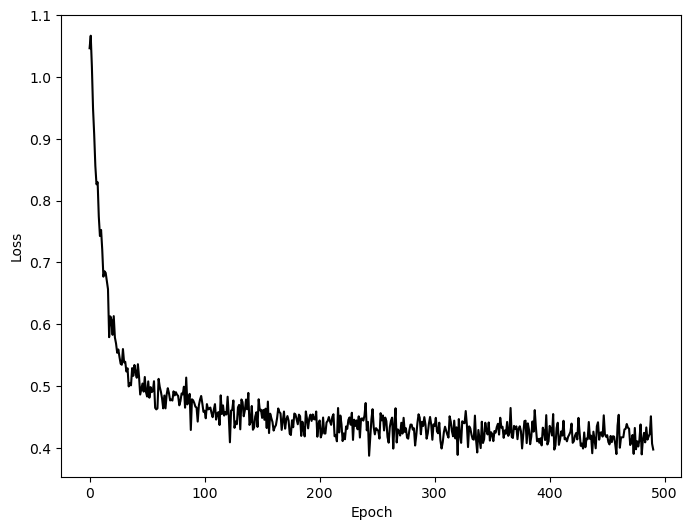

In [568]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(trainer.get_loss_history()[:],color="black")
plt.xlabel("Epoch")
plt.ylabel("Loss")


In [569]:

unmixed = trainer.predict(observables)

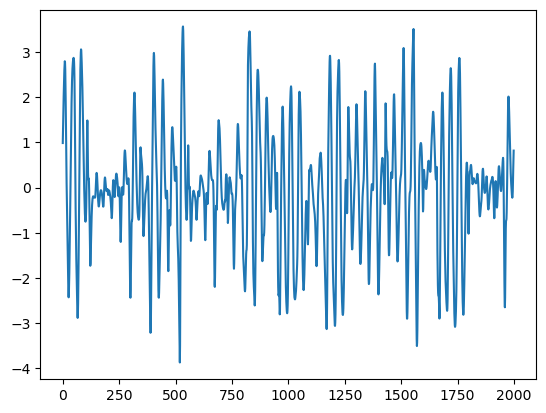

In [570]:

plt.plot(unmixed[:2000,0,0])

Text(0.5, 1.0, 'Reconstructed attractor')

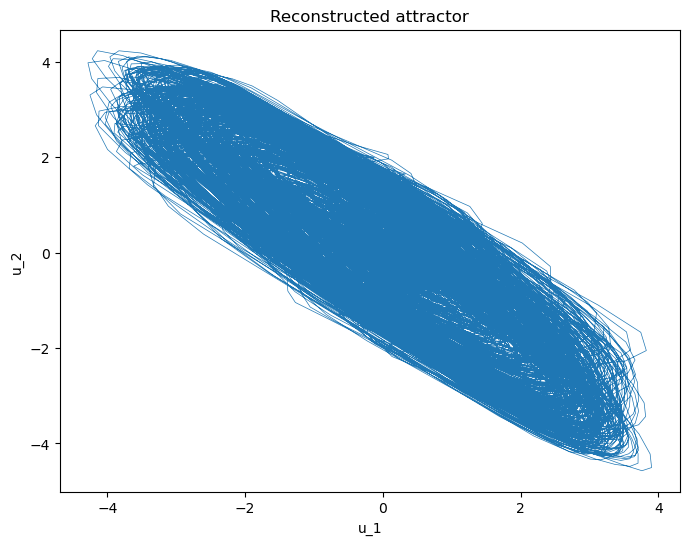

In [571]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(unmixed[:,0,0],unmixed[:,0,1],lw=0.5)
plt.xlabel("u_1")
plt.ylabel("u_2")
plt.title("Reconstructed attractor")

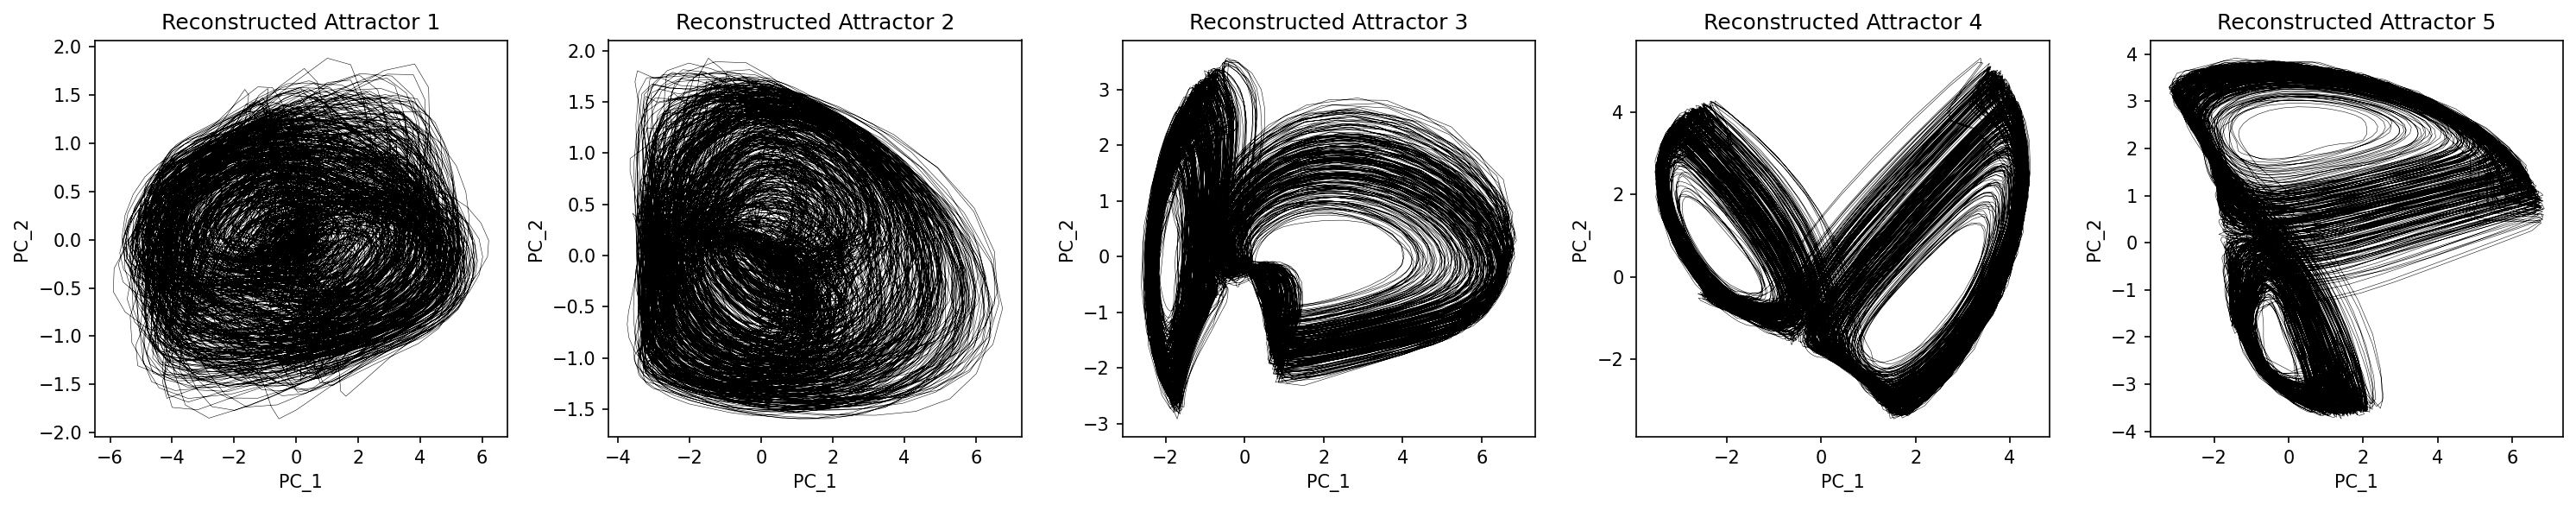

In [563]:
# Assuming 'unmixed' is your data array with shape (n_samples, n_systems, 2)
plt.figure(figsize=(4 * unmixed.shape[1], 4),dpi=150)

for i in range(unmixed.shape[1]):
    plt.subplot(1, unmixed.shape[1], i + 1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=0.25,color="black")
    plt.title(f"Reconstructed Attractor {i + 1}")
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')

plt.tight_layout()
plt.show()

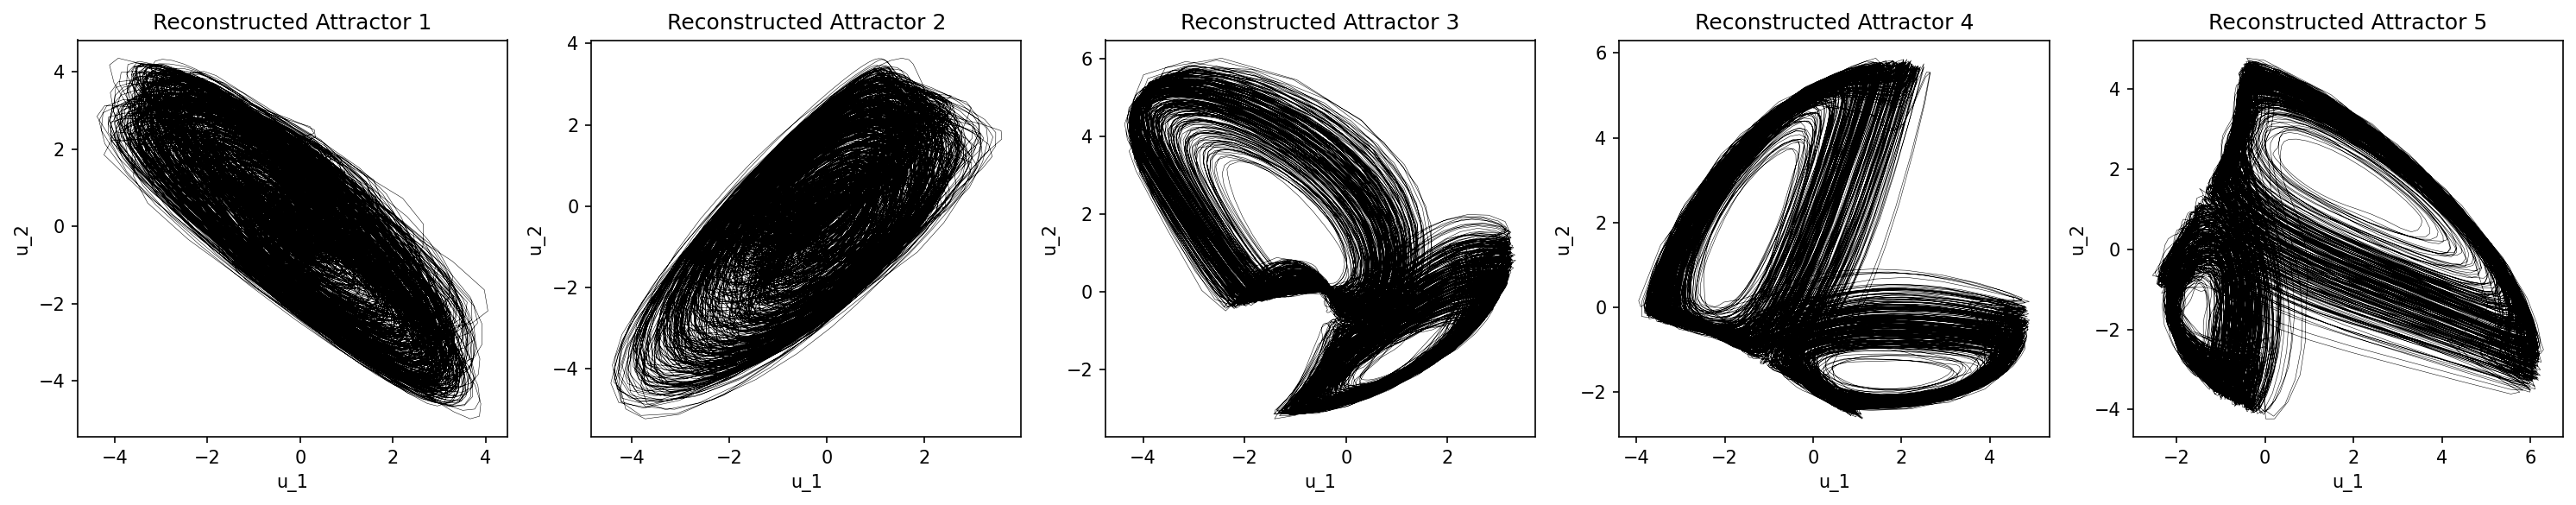

In [554]:
# Assuming 'unmixed' is your data array with shape (n_samples, n_systems, 2)
plt.figure(figsize=(4 * unmixed.shape[1], 4),dpi=150)

for i in range(unmixed.shape[1]):
    plt.subplot(1, unmixed.shape[1], i + 1)
    plt.plot(unmixed[:, i, 0], unmixed[:, i, 1], linewidth=0.25,color="black")
    plt.title(f"Reconstructed Attractor {i + 1}")
    plt.xlabel('u_1')
    plt.ylabel('u_2')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Learned projections')

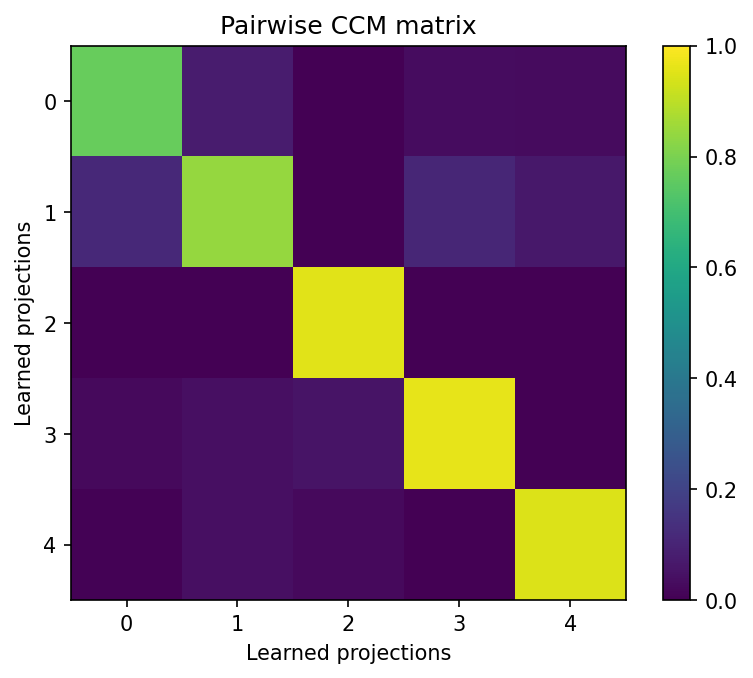

In [564]:
ccm_matrix_unmixed = CCM.PairwiseCCM().compute(
    np.transpose(unmixed, axes=(1, 0, 2)),
    np.transpose(unmixed, axes=(1, 0, 2)),
    1500, 400, 60, 20,
    method="simplex",
    nbrs_num=15,
).mean(axis=0)
plt.figure(dpi=150)
plt.imshow(ccm_matrix_unmixed, vmin=0, vmax=1)
plt.colorbar()
plt.title("Pairwise CCM matrix")
plt.xlabel("Learned projections")
plt.ylabel("Learned projections")


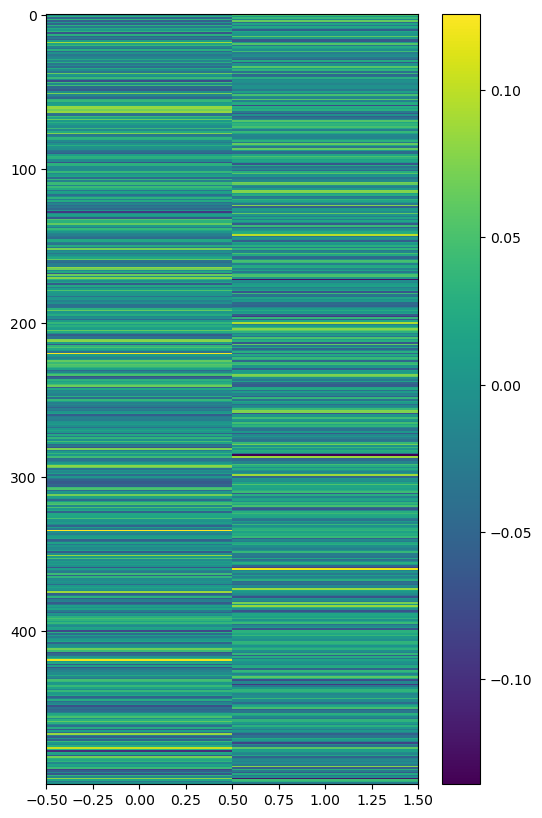

In [556]:

plt.figure(figsize=(6,10))
plt.imshow((trainer.model.get_weights()[:,0]),aspect="auto",interpolation="nearest")
plt.colorbar()

Text(0, 0.5, 'Ground truth')

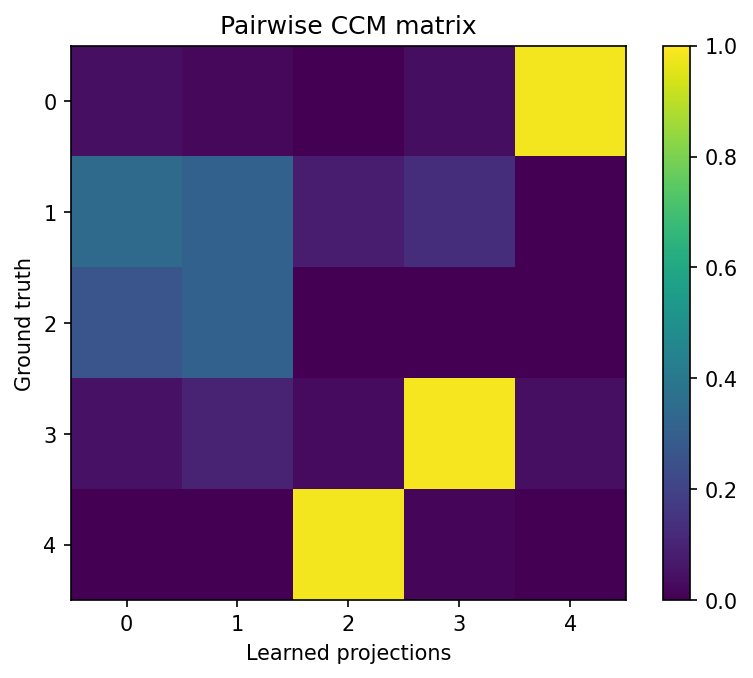

In [565]:
ccm_matrix_unmixed = CCM.PairwiseCCM().compute(
    np.transpose(unmixed, axes=(1, 0, 2)),
    X_,
    1500, 400, 60,0,
    method="simplex",
    nbrs_num=15,
).mean(axis=0)
plt.figure(dpi=150)
plt.imshow(ccm_matrix_unmixed, vmin=0, vmax=1)
plt.colorbar()
plt.title("Pairwise CCM matrix")
plt.xlabel("Learned projections")
plt.ylabel("Ground truth")

IndexError: index 2 is out of bounds for axis 2 with size 2

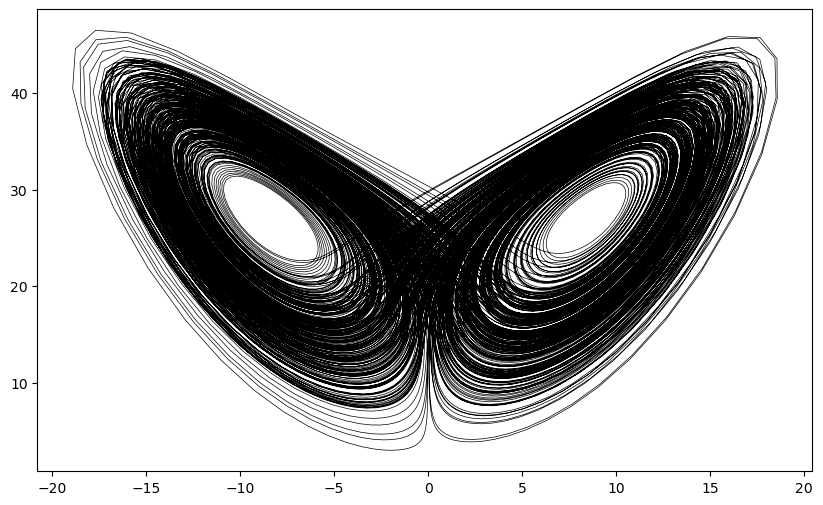

In [566]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(X_[0][:,0],X_[0][:,1],color="black",lw=0.5)
plt.scatter(X_[0][:,0],X_[0][:,1],c=unmixed[:,0,2],zorder=100,cmap="magma")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Lorenz attractor, receptive field of one kernel")
plt.colorbar()